### # Domain Knowledge 2 : 광고성과지표
| 광고성과지표 | = | 계산식 |
|:---------- |---------- |:---------- |
|CTR(Click Through Rate)|=|클릭수 / 노출수 * 100|
|CPM(Cost Per Mile)|=|광고비용 / 노출수 * 1000|
|CPC(Cost Per Click)|=|광고비용 / 클릭수|
|CPA(Cost Per Action)|=|광고비용 / 구매수|

----------------------

In [49]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

import matplotlib.pyplot as plt

In [3]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

In [22]:
df=pd.read_excel('./data/네이버보고서.xls', utf='kr',skiprows=[0])
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   광고그룹             1381 non-null   object 
 1   키워드              1381 non-null   object 
 2   노출수              1381 non-null   int64  
 3   클릭수              1381 non-null   float64
 4   클릭률(%)           1381 non-null   float64
 5   평균클릭비용(VAT포함,원)  1381 non-null   float64
 6   총비용(VAT포함,원)     1381 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 75.6+ KB


In [37]:
df.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1.381000e+03,1381.000000,1381.000000,1381.000000,1.381000e+03
mean,3.505415e+04,52.530630,0.352918,981.631962,3.791958e+04
std,2.964650e+05,387.502772,1.000462,1372.389897,1.421492e+05
min,1.001000e+03,0.000000,0.000000,0.000000,0.000000e+00
25%,1.814000e+03,1.200000,0.010000,64.170000,7.700000e+01
50%,3.805000e+03,3.600000,0.060000,395.980000,2.123000e+03
75%,1.073400e+04,14.400000,0.240000,1302.810000,1.743500e+04
max,9.626374e+06,9606.000000,13.590000,9362.530000,2.512444e+06


In [46]:
df.columns

Index(['광고그룹', '키워드', '노출수', '클릭수', '클릭률(%)', '평균클릭비용(VAT포함,원)',
       '총비용(VAT포함,원)'],
      dtype='object')

In [ ]:
# 항상 float 형식으로, 실수는 소수점 2자리로 반올림하여 출력
pd.set_option('display.float_format', '{:.2f}'.format) 

In [ ]:
df.isnull().sum() #칼럼 단위 결측치 확인
# df.isnull().sum(axis=1) #행 단위 결측치 확인

In [47]:
print('행과 열 : ', df.shape)
print('광고그룹 고유 개수 :', df['광고그룹'].nunique())
print('키워드 고유 개수 : ', df['키워드'].nunique())

행과 열 :  (1381, 7)
광고그룹 고유 개수 : 186
키워드 고유 개수 :  1112


In [48]:
df['광고그룹'].value_counts()

올인원 패키지 : 업무자동화_3. 엑셀            93
AOP 전체_중복키워드_디자인                 57
#000_마케팅 전체_main                 48
ㅍAOP 전체_중복키워드_디자인(삭제)            46
1. 전체                            26
                                 ..
올인원 패키지 : 디지털 마케팅_2. 페이스북 광고      1
올인원 패키지 : 파이썬 웹 개발_3.FLASK기초      1
올인원 패키지 : 1인 쇼핑몰 시작하기_04.호스팅사     1
올인원 패키지 : 영상 제작/편집_10.패캠강의        1
프론트엔드 개발 스쿨 12기_기존 키워드            1
Name: 광고그룹, Length: 186, dtype: int64

### ▼

In [50]:
df['노출수'].sort_values(ascending=False)

4       9626374
173     3095998
0       2319456
9       1887822
13      1470452
         ...   
442        1007
983        1006
597        1005
445        1003
1057       1001
Name: 노출수, Length: 1381, dtype: int64

In [59]:
imp_sort = df['노출수'].sort_values()
imp_sort = imp_sort.reset_index() #기본 인덱스 설정
imp_sort.head()

,index,노출수
0,1057,1001
1,445,1003
2,597,1005
3,983,1006
4,442,1007


In [60]:
imp_sort.drop('index',axis=1)
imp_sort.head()

,index,노출수
0,1057,1001
1,445,1003
2,597,1005
3,983,1006
4,442,1007


In [61]:
imp_sort.drop('index',axis=1,inplace=True)
imp_sort.head()

,노출수
0,1001
1,1003
2,1005
3,1006
4,1007


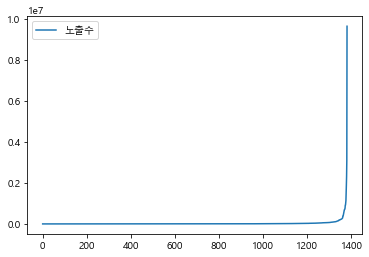

In [62]:
imp_sort.plot()
plt.show()

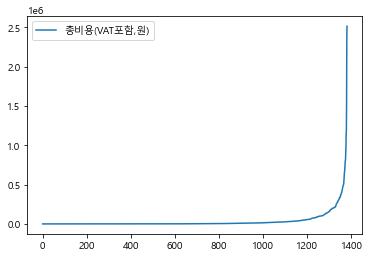

In [63]:
(((df['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('index',axis=1)).plot()
plt.show()

In [28]:
# 형 변환

clk = df['클릭수']
clk = clk.astype(int)

pandas.core.series.Series

## CTR(클릭률) : 클릭수/노출수*100

In [31]:
df['클릭률(%)'] = round(df['클릭수']/df['노출수']*100, 2)
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.41,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.05,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.03,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.27,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.01,1408.435349,1145903


In [33]:
# 평균클릭비용(VAT포함,원) 칼럼의 반올림 처리

df['평균클릭비용(VAT포함,원)'] = round(df['평균클릭비용(VAT포함,원)'],2)
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.41,261.55,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.05,295.97,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.03,4841.66,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.27,630.59,1175174
4,3. html,HTML,9626374,813.6,0.01,1408.44,1145903
